In [1]:
import coco_dataset
import pathlib
import show_utils
import matplotlib.pyplot as plt
from torchvision import transforms
import torchvision.transforms.functional as F
import torch
import common
import numpy as np

In [2]:
inp_size = (368, 368)
targ_size = (46, 46)
coco_dataset = coco_dataset.CocoKeypoints(
    root=str(pathlib.Path("../coco") / "images" / "train2017"),
    annFile=str(pathlib.Path("../coco") / "annotations" / "annotations" / "person_keypoints_train2017.json"),
    input_transform=transforms.Compose([
        transforms.Resize(inp_size),
        transforms.ToTensor(),
        transforms.ConvertImageDtype(torch.float32),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]),
    targ_size=targ_size)
i = 0

loading annotations into memory...
Done (t=6.06s)
creating index...
index created!


In [3]:
i = 5

sample: 5
(640, 446)


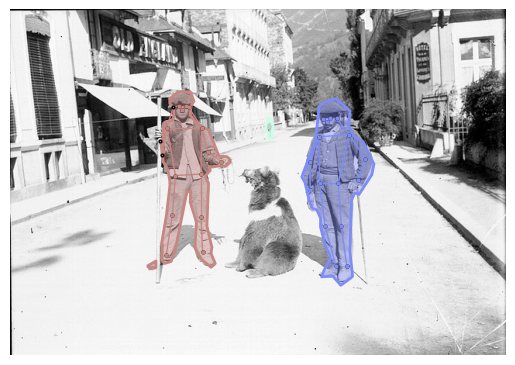

In [4]:
tf_image, pafs, heatmaps, image, paf_locs, target = coco_dataset[i]

show_utils.show_coco(image, target, coco_dataset.coco, draw_bbox=False)

print(f"sample: {i}")
print(image.size)
i += 1

In [5]:
heatmaps = heatmaps.numpy()
pafs = pafs.numpy()
paf_locs = np.array(paf_locs, dtype=float)

Heatmaps.size = (19, 46, 46)


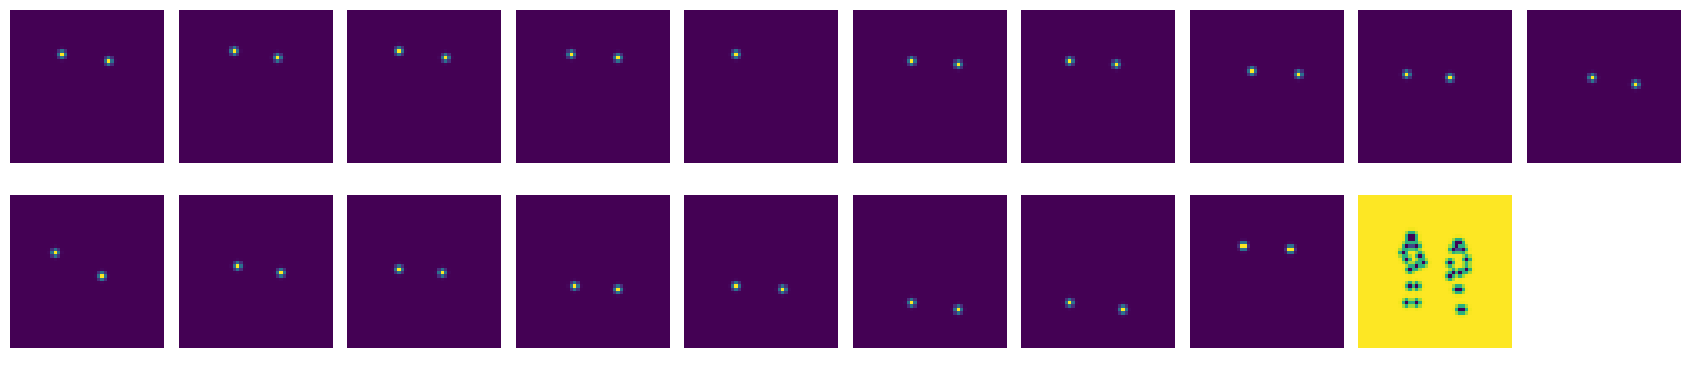

Pafs.size = (34, 46, 46)


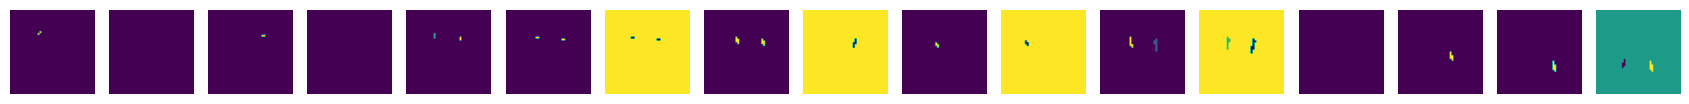

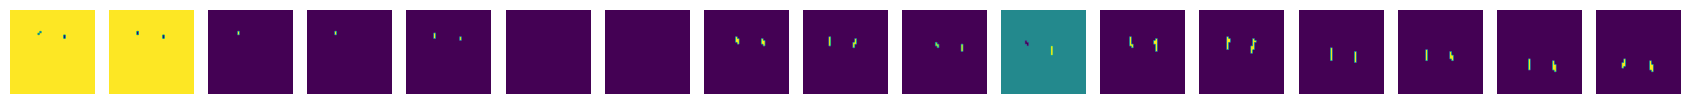

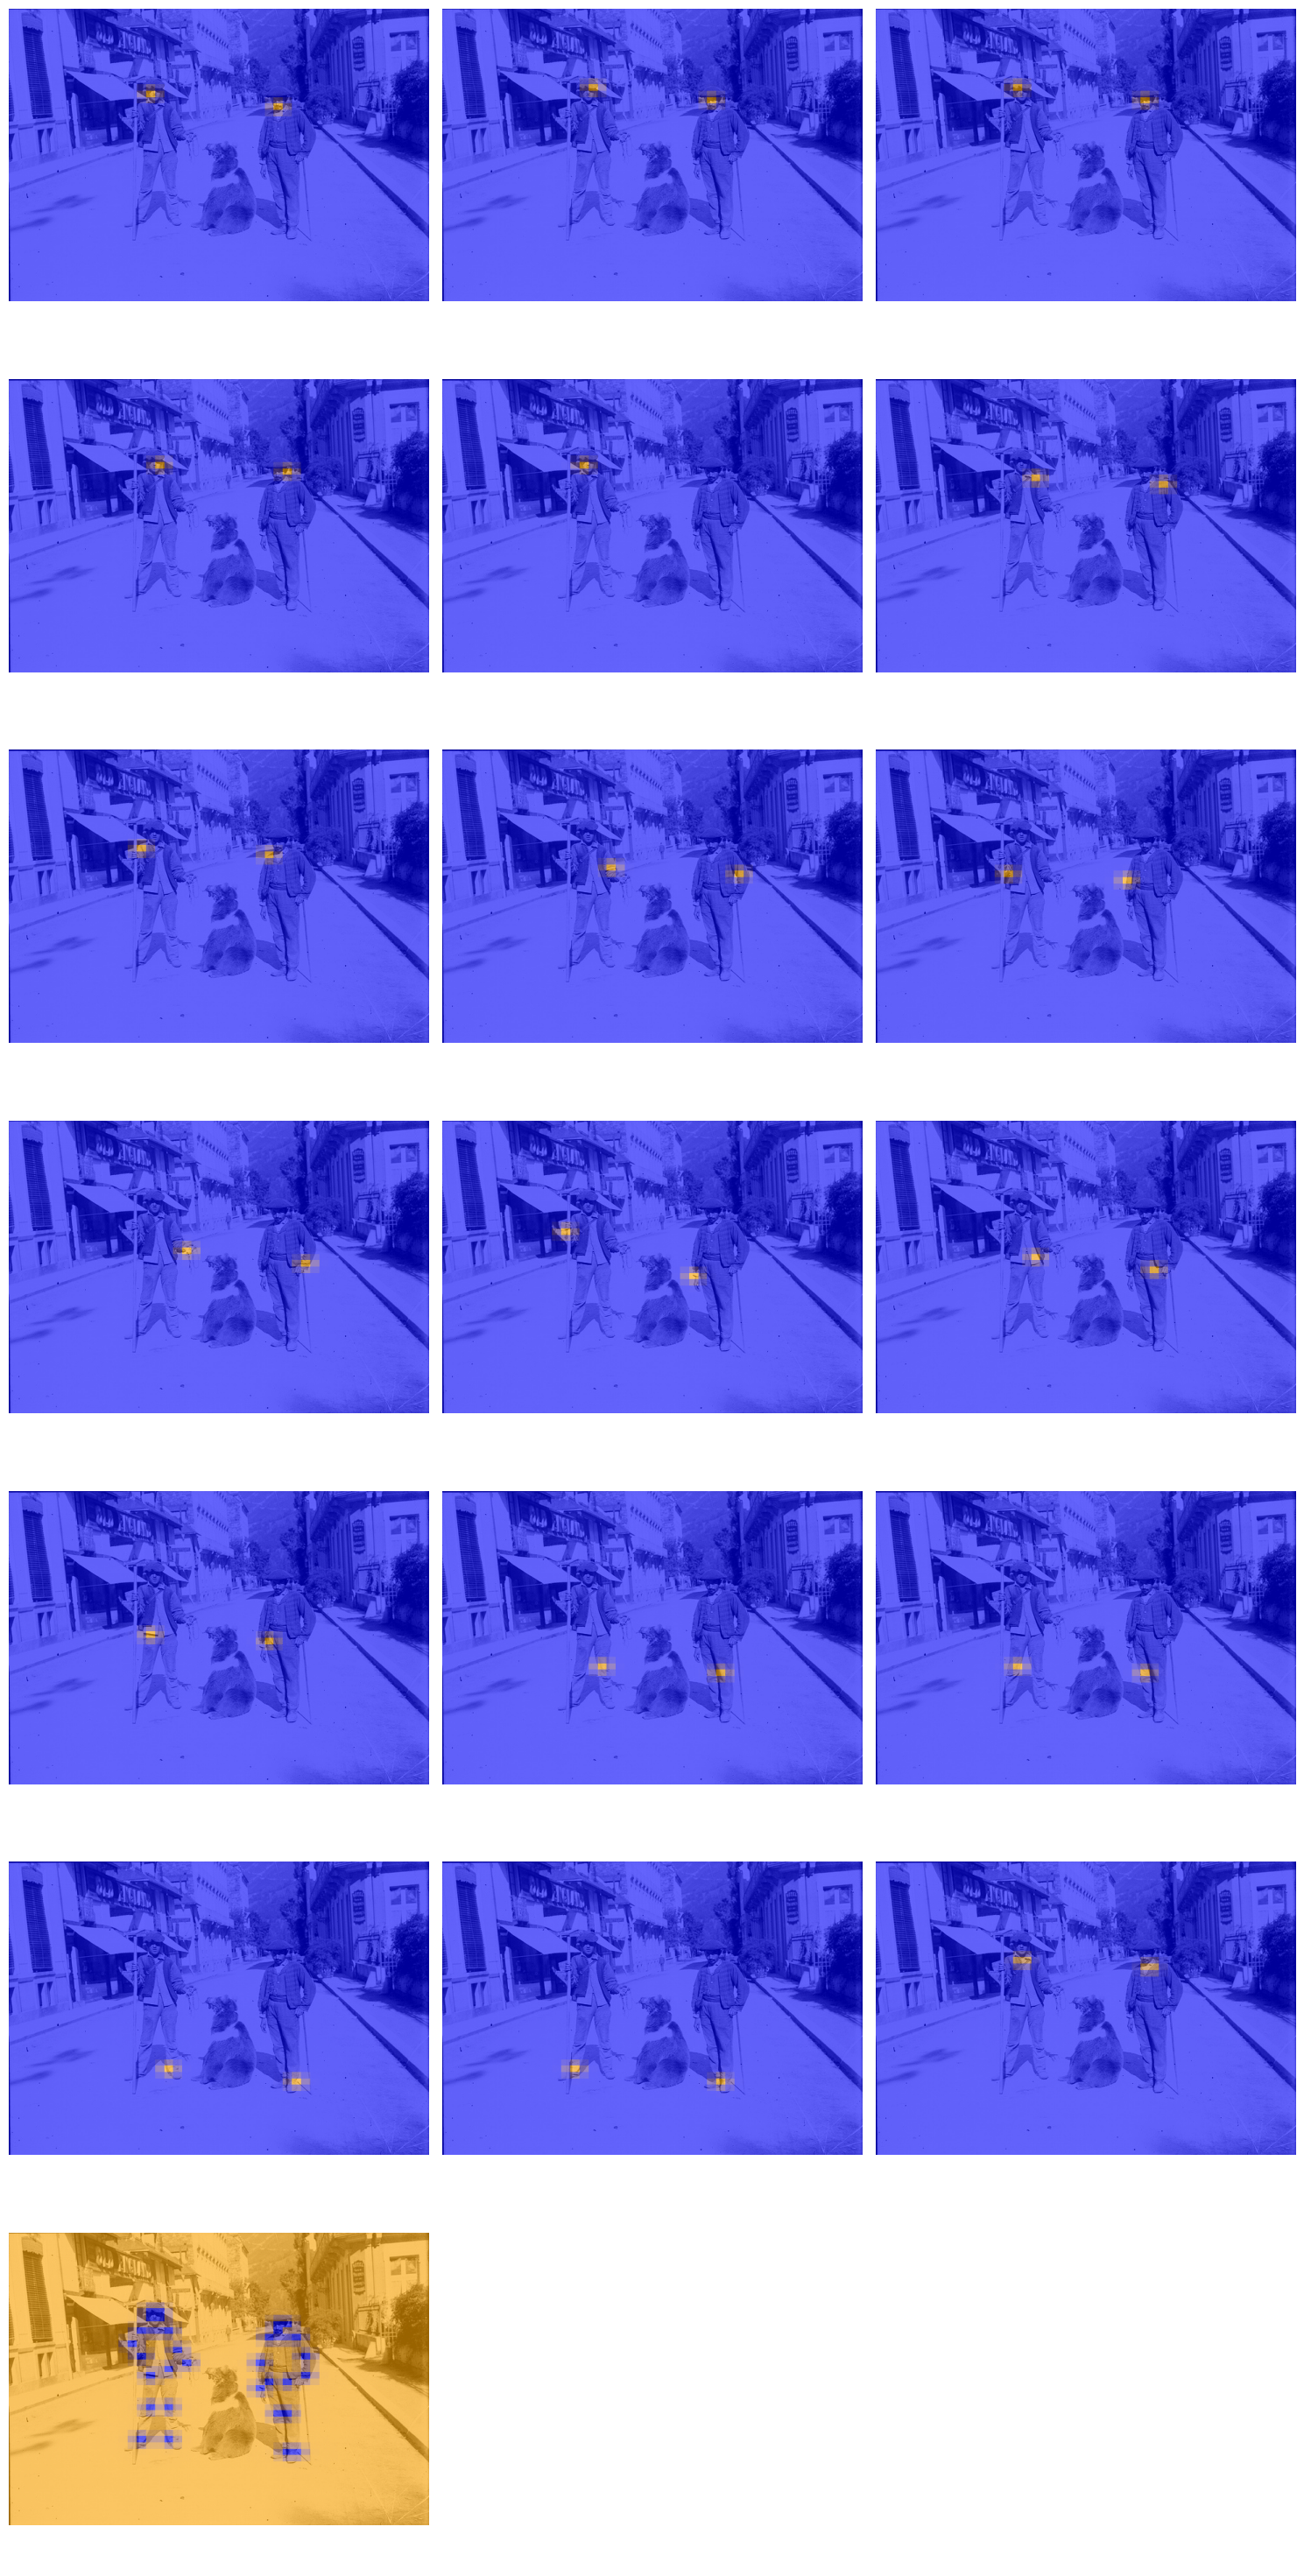

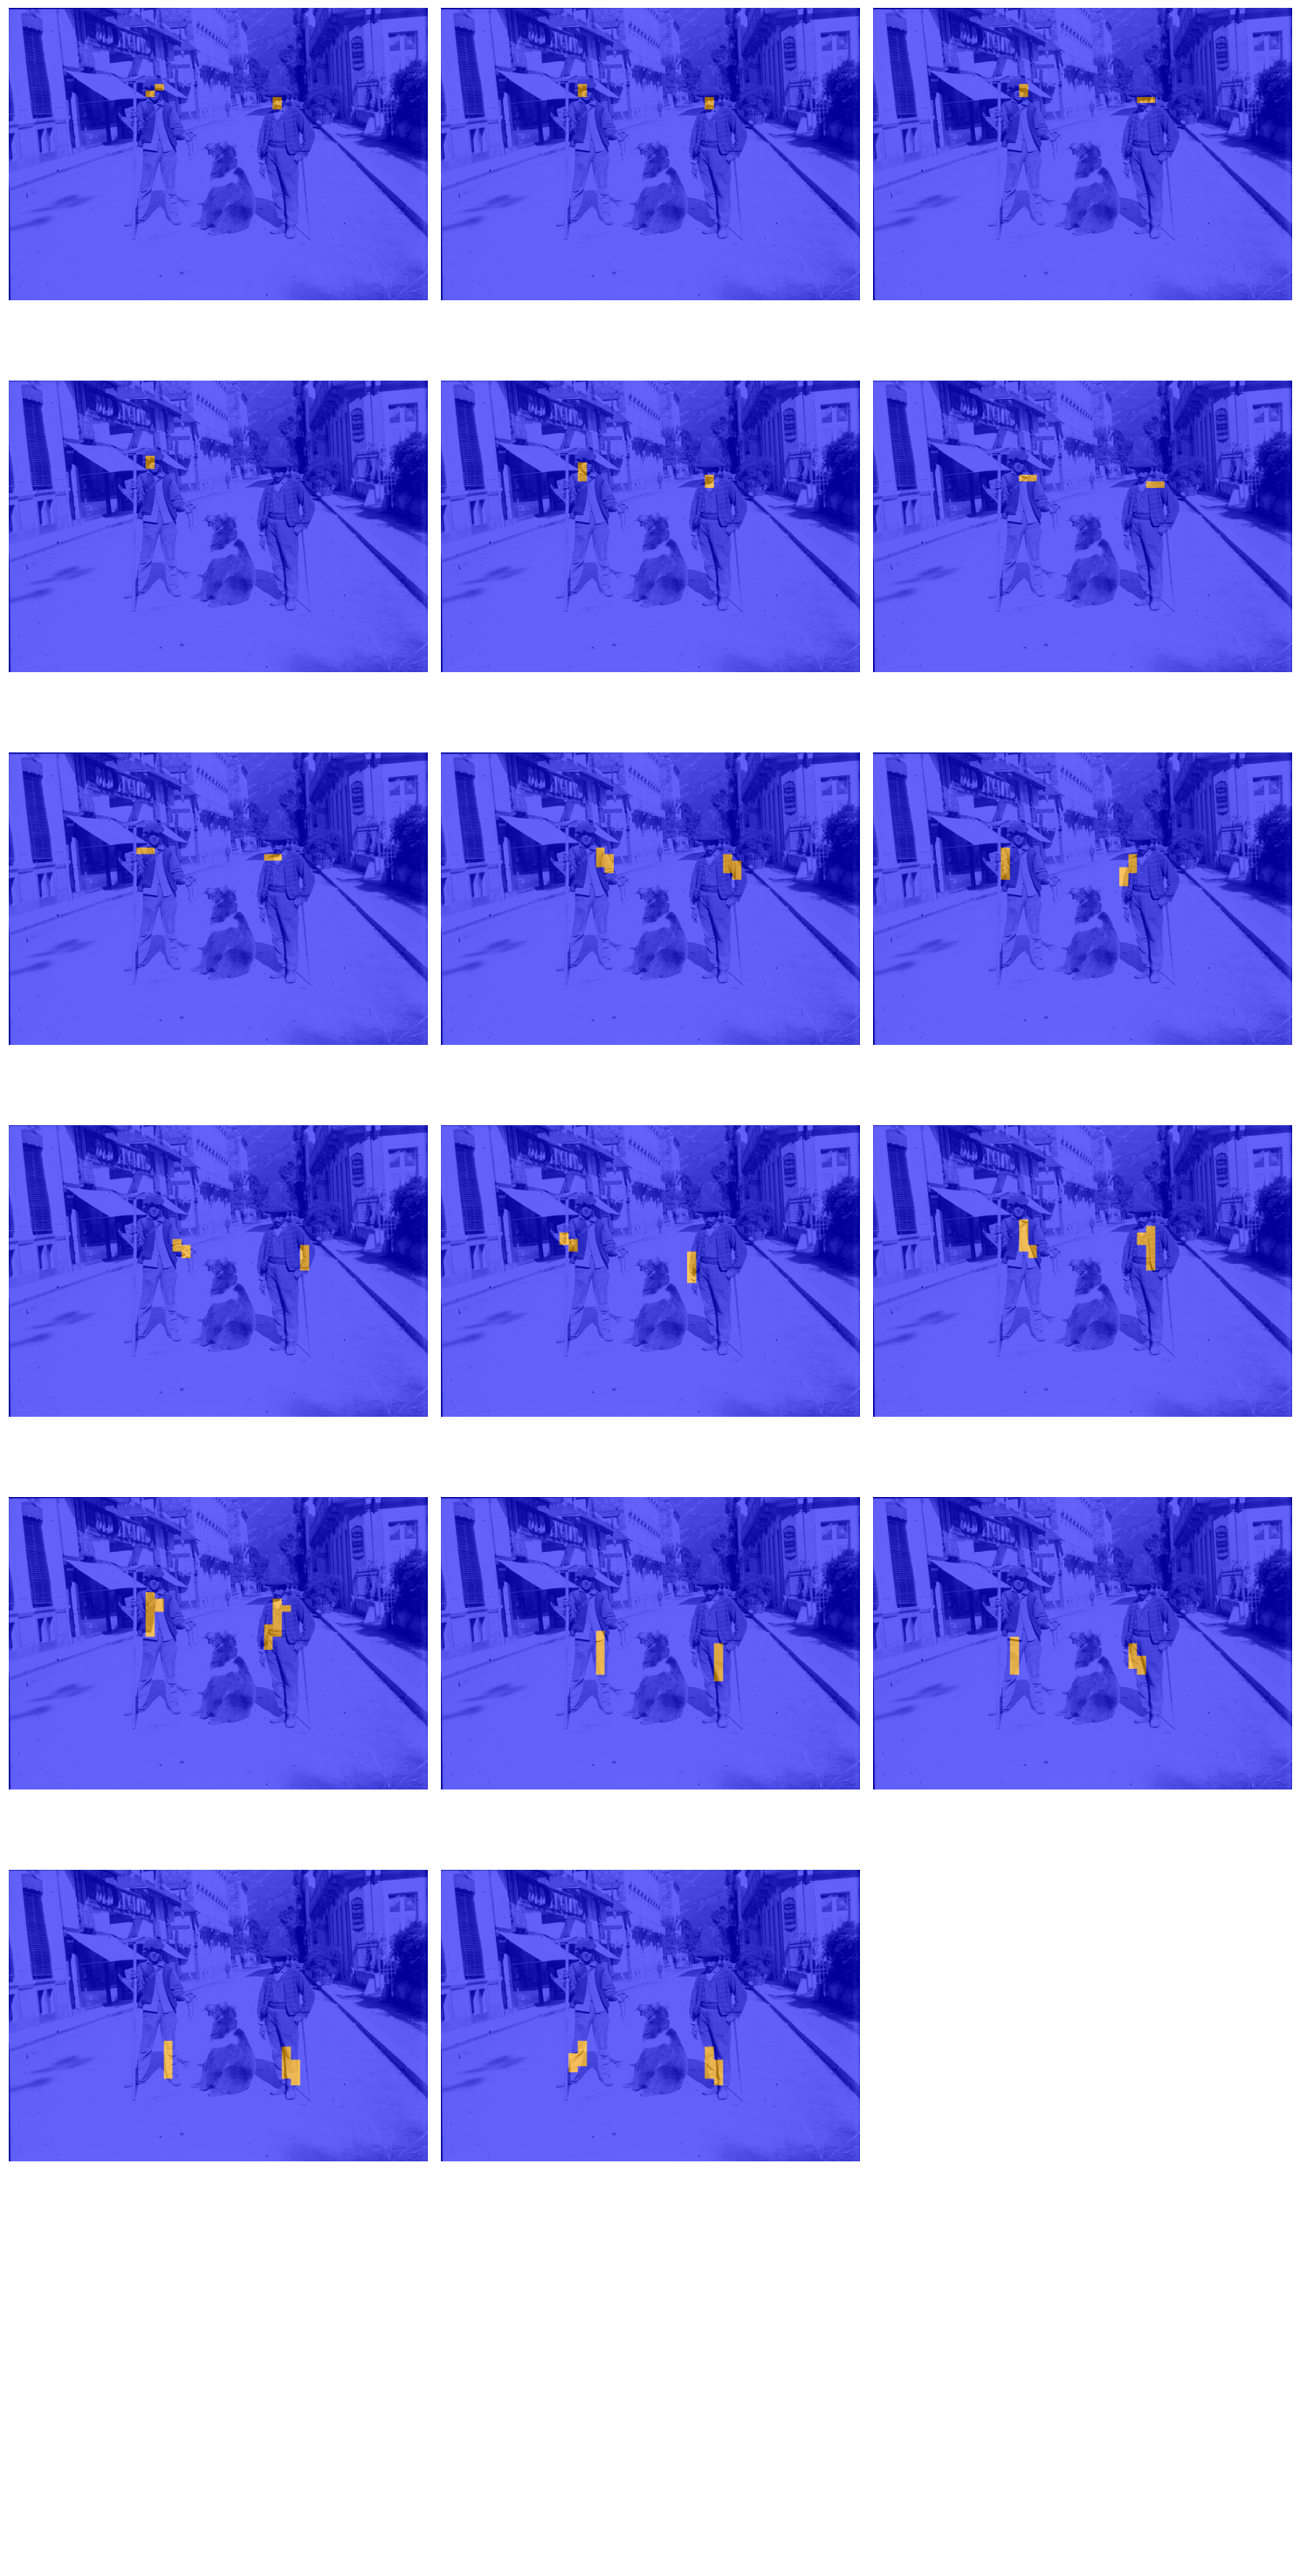

In [6]:
#---------heatmaps---------
print(f"Heatmaps.size = {heatmaps.shape}")
show_utils.plot_grid(heatmaps, 2, 10, (17,4))

#---------pafs---------
print(f"Pafs.size = {pafs.shape}")
ida = [x for x in range(len(pafs)) if x%2==0]
idb = [x for x in range(len(pafs)) if x%2==1]

show_utils.plot_grid(pafs[ida], 1, 17, (17, 2))
show_utils.plot_grid(pafs[idb], 1, 17, (17, 2))

#---------blend---------
show_utils.blend(heatmaps, image)
show_utils.blend(paf_locs, image)

#---------surface---------
# show_utils.surface(heatmaps[5])

# show_utils.show_pafs_quiver(pafs, keypoints, size=targ_size)
# plt.figure()
# show_utils.show_pafs_quiver_combined(pafs, size=targ_size)
# show_utils.show_tensors(mask_out)

In [7]:
import post
image_size = image.size
kpt_groups = post.post_process(heatmaps, pafs, image_size)

if kpt_groups:
    keypoints_post = post.coco_format(kpt_groups)
    # show_utils.draw_keypoints(image,keypoints_post, connectivity=common.connect_skeleton, keypoint_color="orange", line_color="magenta")
else:
    print("NO DETECTIONS")

TypeError: Unexpected type <class 'numpy.ndarray'>